In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
# URL of the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load dataset into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first 5 rows
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
#task1

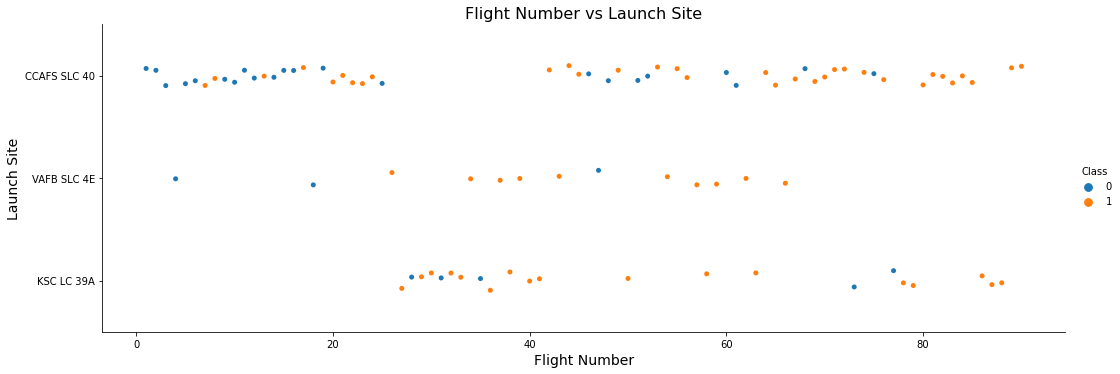

In [11]:
# Plot a scatter point chart
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=3, kind="strip")
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site", fontsize=16)
plt.show()

In [12]:
#task2

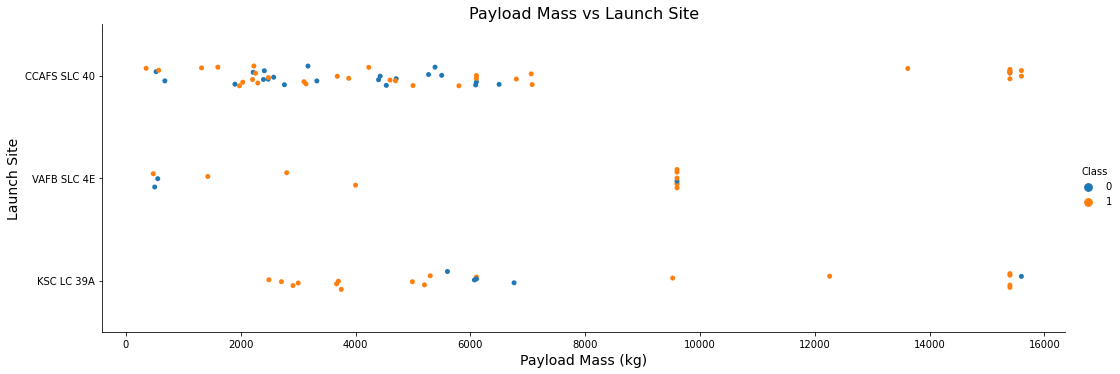

In [13]:
# Plot a scatter point chart for Payload Mass vs Launch Site
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=3, kind="strip")
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site", fontsize=16)
plt.show()


In [14]:
#task3

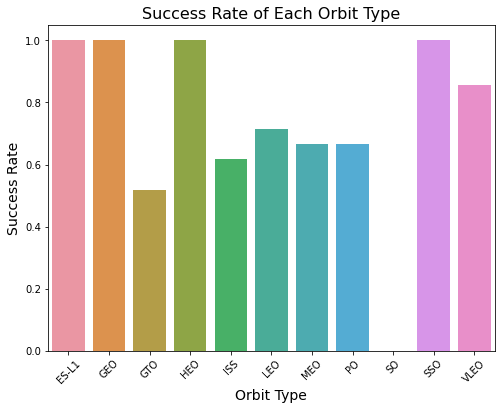

In [15]:
# Group by Orbit and calculate the mean success rate for each orbit type
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Orbit", y="Class", data=orbit_success_rate)
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate of Each Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [16]:
#task4

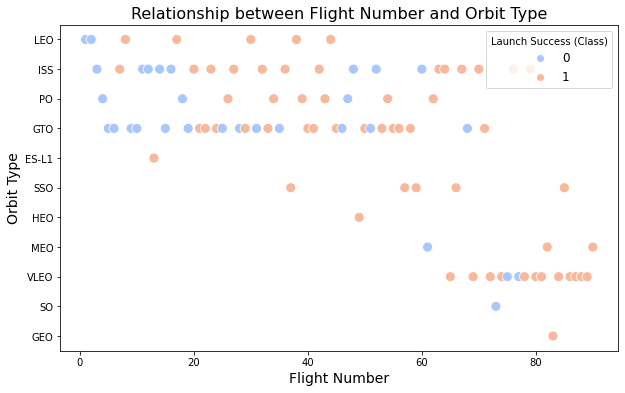

In [17]:
# Plot the scatter plot with FlightNumber on the x-axis, Orbit on the y-axis, and hue based on Class (success or failure)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df, palette="coolwarm", s=100)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=16)
plt.legend(title='Launch Success (Class)', loc='upper right', fontsize=12)
plt.show()


In [18]:
#task5

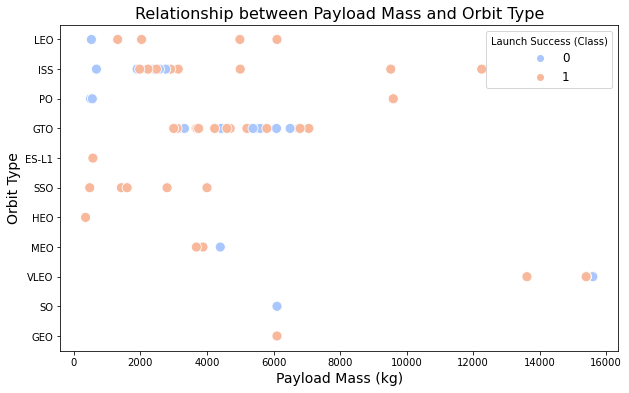

In [19]:
# Plot the scatter plot with Payload Mass on the x-axis, Orbit on the y-axis, and hue based on Class (success or failure)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df, palette="coolwarm", s=100)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=16)
plt.legend(title='Launch Success (Class)', loc='upper right', fontsize=12)
plt.show()


In [20]:
#task6

In [21]:
# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Display the first few rows to verify the extraction
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [22]:
# Calculate the average success rate per year
success_rate_by_year = df.groupby('Year')['Class'].mean()

# Display the success rate by year
success_rate_by_year


Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

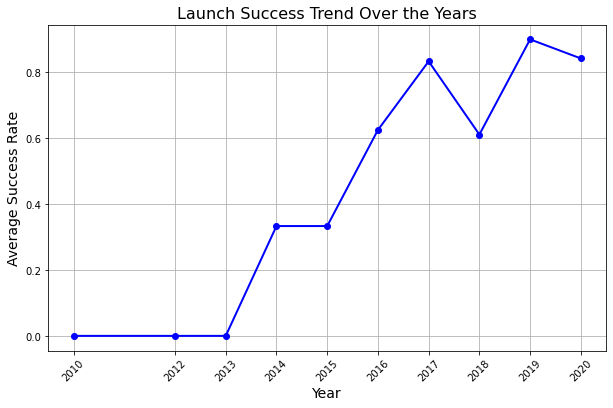

In [23]:
# Plotting the success rate trend over the years
plt.figure(figsize=(10, 6))
success_rate_by_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Launch Success Trend Over the Years", fontsize=16)
plt.grid(True)
plt.xticks(success_rate_by_year.index, rotation=45)
plt.show()


In [24]:
# Select relevant features for prediction
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Display the first few rows to check the selected features
features.head()


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [25]:
#Task7

In [26]:
# Apply One-Hot Encoding to categorical columns: Orbit, LaunchSite, LandingPad, and Serial
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

# Display the first few rows of the encoded dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#task8

In [28]:
# Cast all columns in the dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# Check the data types to verify the change
features_one_hot.dtypes


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object

In [29]:
# Export the processed data to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)
